In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from super_cub import *

In [14]:
alphas = np.linspace(-6.27, 15, 100)
del_e = np.linspace(-10, 10, 5)
Re_c = 500000
airplane = super_cub()
h = 0.4
Cms = np.zeros((len(del_e), len(alphas)))
Cls = np.zeros((len(del_e), len(alphas)))
Cds = np.zeros((len(del_e), len(alphas)))

for i in range(len(del_e)):
    for j in range(len(alphas)):
        Cms[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[0]
        Cls[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[1]
        Cds[i,j] = airplane.get_coefficients(alphas[j], del_e[i], Re_c, h)[2]
    
plt.style.use('default')   # Set the aesthetic style of the plots

# Define the del_e values
del_e_values = np.linspace(-10, 10, 5)

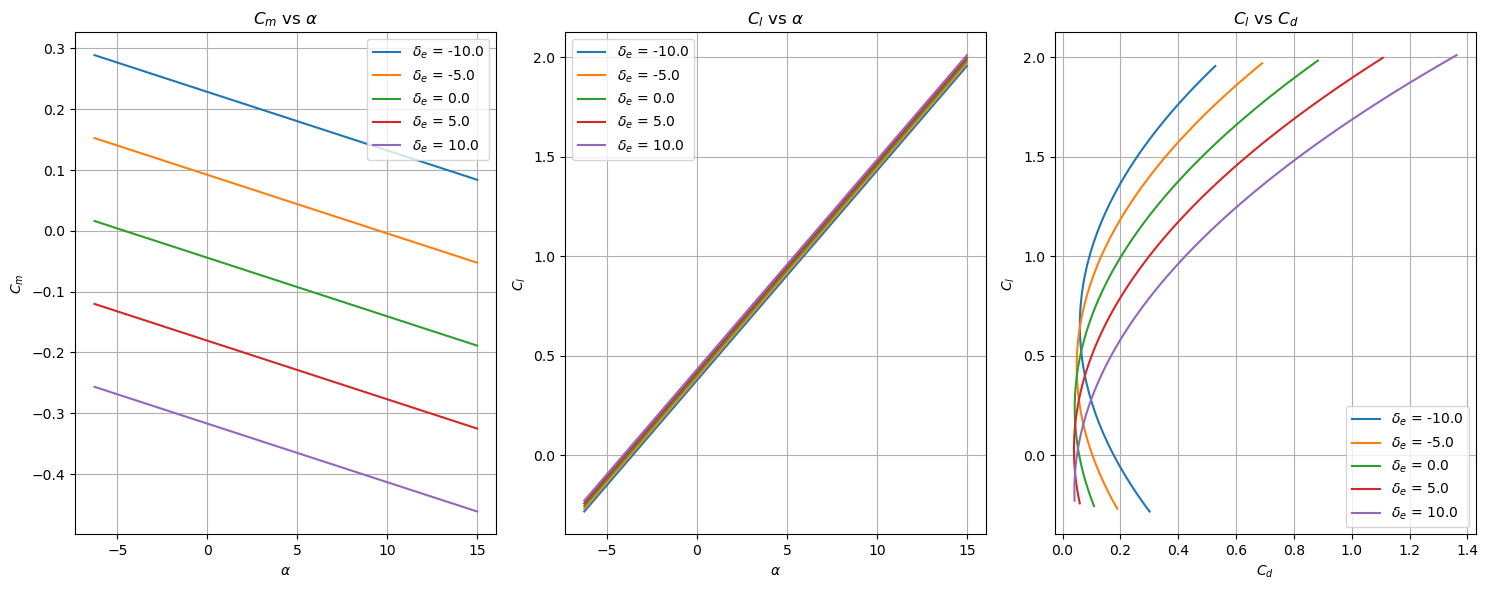

In [15]:
fig, axs = plt.subplots(1,3, figsize=(15, 6))

# Plot Cm vs alphas for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[0].plot(alphas, Cms[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[0].set_title("$C_m$ vs $\\alpha$")
axs[0].set_xlabel("$\\alpha$")
axs[0].set_ylabel("$C_m$")

# Add a legend
axs[0].legend()
axs[0].grid(True)

# Plot Cl vs alphas for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[1].plot(alphas, Cls[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[1].set_title("$C_l$ vs $\\alpha$")
axs[1].set_xlabel("$\\alpha$")
axs[1].set_ylabel("$C_l$")

# Add a legend
axs[1].legend()
axs[1].grid(True)

# Plot Cl vs Cd for each del_e value
for i, del_e in enumerate(del_e_values):
    axs[2].plot(Cds[i], Cls[i], label=f"$\delta_e$ = {del_e}")
    
# Set the plot title and labels
axs[2].set_title("$C_l$ vs $C_d$")
axs[2].set_xlabel("$C_d$")
axs[2].set_ylabel("$C_l$")

# Add a legend
axs[2].legend()
axs[2].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.savefig('subplot_plots.jpg', dpi=300)
plt.show()

In [16]:
from scipy.optimize import fsolve

alpha_trim = np.linspace(-18,18, 100)
trim_cl = []
trim_cd = []

for alpha in alpha_trim:
    f_CM = lambda x: airplane.get_coefficients(5, x, Re_c, h)[0]
    del_e = fsolve(f_CM, 0)[0]
    trim_cl.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[1])
    trim_cd.append(airplane.get_coefficients(alpha, del_e, Re_c, h)[2])


In [17]:
from scipy.optimize import curve_fit

def parabolic_function(x, cd0, K):
    return cd0 + K*x**2

popt, _ = curve_fit(parabolic_function, trim_cl, trim_cd)
print(popt)

[0.14431346 0.17339972]


In [18]:
%matplotlib widget
# Fit the data to a quadratic equation
coefficients = np.polyfit(trim_cl, trim_cd, 2)

# Extract the coefficients
cd0 = popt[0]
K = popt[1]

# Generate the fitted curve
fit_curve = np.polyval(coefficients, trim_cl)

fig = plt.figure()
# Plot the data and the fitted curve
plt.plot(trim_cd, trim_cl, label='Data')
plt.plot(cd0+K*np.array(trim_cl)**2, trim_cl, label='Fitted Curve')

# Annotate the fit equations
equation = f"$C_d = {cd0:.5f} + {K:.5f}C_l^2$"
plt.annotate(equation, xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12)

# Set the plot title and labels
plt.title("Trimmed Drag Polar with Fitted Curve")
plt.xlabel("$C_d$")
plt.ylabel("$C_l$")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('Trimmed_Drag_Polar.jpg', dpi=300)
plt.show()


In [ ]:
v = np.linspace(6, 14, 100)
rho = 1.22
thrust = cd0*rho*v**2*airplane.Sw/2 + 2*K*(0.75*9.81)**2/(rho*v**2*airplane.Sw)
power = cd0*rho*v**3*airplane.Sw/2 + 2*K*(0.75*9.81)**2/(rho*v*airplane.Sw)

gram_thrust = thrust/(9.81)*1000



In [ ]:
# Find the index of the minimum gram thrust value
fig, ax1 = plt.subplots()
min_index = np.argmin(gram_thrust)

# Annotate the minimum gram thrust value
ax1.annotate(f"Velocity for min thrust: {v[min_index]:.2f} m/s", 
             xy=(v[min_index], gram_thrust[min_index]), 
             xytext=(v[min_index]-2, gram_thrust[min_index]+25), 
             arrowprops=dict(facecolor='black', arrowstyle='->'))


# Plot gram thrust
ax1.plot(v, gram_thrust, 'b-', label='Gram Thrust')
ax1.set_xlabel('Velocity (m/s)')
ax1.set_ylabel('Thrust (grams)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot power
ax2.plot(v, power, 'r-', label='Power')
ax2.set_ylabel('Power', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Set the plot title
plt.title('Thrust and Power vs Velocity')

# Show the plot
plt.grid(True)
plt.savefig('Thrust_and_Power_vs_Velocity.jpg', dpi=300)
plt.show()


In [ ]:
thrust1 = cd0*rho*v**2*airplane.Sw/2
thrust2 = 2*K*(0.75*9.81)**2/(rho*v**2*airplane.Sw)

import matplotlib.pyplot as plt

fig = plt.figure()
# Plot thrust1 and thrust2 against v
plt.plot(v, thrust1, label='Thrust 1')
plt.plot(v, thrust2, label='Thrust 2')
plt.plot(v, thrust, label='Thrust')

# Set the plot title and labels
plt.title('Thrust 1 and Thrust 2 vs Velocity')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Thrust')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.widgets import Button, Slider


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()